**World Happiness Report** </br>

Hareem Raza - 22100277 </br>
Muhammad Raahim Khan - 21100157 </br>
Momin Mehmood Butt - 21100286 </br>

Folder Link: https://drive.google.com/drive/folders/1erPk2ph0z5X_pTsc7aZHYwDgf3kUSwKN?usp=sharing

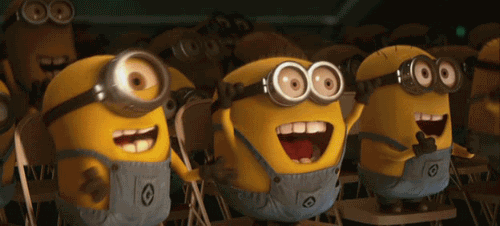

# Mount drive

In [148]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


# Loading R magic

In [149]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Imports

In [150]:
%%R

# installed packages located here
lib_loc <- "/content/drive/MyDrive/Statistics Project Spring 2021/packages"

# to install a package: install.packages(packageName, lib = lib_loc)
# to import a package: library(packageName, lib.loc = lib_loc)

In [151]:
%%R

library(tidyverse)
library('dplyr')
library('tidyverse')
library('ggplot2')
library(carData, lib.loc = lib_loc)
library(car, lib.loc = lib_loc)
library(corrplot, lib.loc = lib_loc)
library(caTools, lib.loc = lib_loc)
library(GGally, lib.loc = lib_loc)
library(moments, lib.loc = lib_loc)
library(viridis, lib.loc = lib_loc)
library("sp", lib.loc = lib_loc)
library("rworldmap", lib.loc = lib_loc)

# Set Working Directory and global paths

In [152]:
%%R

workingDirectory = '/content/drive/MyDrive/Statistics Project Spring 2021/'
plotsDirectory = '/content/drive/MyDrive/Statistics Project Spring 2021/Plots/'

setwd(workingDirectory)

# Reading datasets

In [153]:
%%R

df_2015 <- read.csv("Dataset/2015.csv", header = TRUE)
df_2016 <- read.csv("Dataset/2016.csv", header = TRUE)
df_2017 <- read.csv("Dataset/2017.csv", header = TRUE)
df_2018 <- read.csv("Dataset/2018.csv", header = TRUE)
df_2019 <- read.csv("Dataset/2019.csv", header = TRUE)

# Method

## Data selection and cleaning

In [154]:
%%R

# Printing first 6 entries of each dataset

print('2015 dataset')
print(head(df_2015))

cat("\n")

print('2016 dataset')
print(head(df_2016))

cat("\n")

print('2017 dataset')
print(head(df_2017))

cat("\n")

print('2018 dataset')
print(head(df_2018))

cat("\n")

print('2019 dataset')
print(head(df_2019))

[1] "2015 dataset"
      Country         Region Happiness.Rank Happiness.Score Standard.Error
1 Switzerland Western Europe              1           7.587        0.03411
2     Iceland Western Europe              2           7.561        0.04884
3     Denmark Western Europe              3           7.527        0.03328
4      Norway Western Europe              4           7.522        0.03880
5      Canada  North America              5           7.427        0.03553
6     Finland Western Europe              6           7.406        0.03140
  Economy..GDP.per.Capita.  Family Health..Life.Expectancy. Freedom
1                  1.39651 1.34951                  0.94143 0.66557
2                  1.30232 1.40223                  0.94784 0.62877
3                  1.32548 1.36058                  0.87464 0.64938
4                  1.45900 1.33095                  0.88521 0.66973
5                  1.32629 1.32261                  0.90563 0.63297
6                  1.29025 1.31826              

In [155]:
%%R

# Printing dimensions (rows x cols)

cat("Dimensions of 2015 dataset: ", dim(df_2015), "\n")
cat("Dimensions of 2016 dataset: ", dim(df_2016), "\n")
cat("Dimensions of 2017 dataset: ", dim(df_2017), "\n")
cat("Dimensions of 2018 dataset: ", dim(df_2018), "\n")
cat("Dimensions of 2019 dataset: ", dim(df_2019), "\n")

Dimensions of 2015 dataset:  158 12 
Dimensions of 2016 dataset:  157 13 
Dimensions of 2017 dataset:  155 12 
Dimensions of 2018 dataset:  156 9 
Dimensions of 2019 dataset:  156 9 


From the output of the above cell, we can see that number of columns for our datasets are un equal so we have to do some preprocessing.

In [156]:
%%R

# Printing columns of each dataset

print('colnames of 2015 dataset')
print(colnames(df_2015))

cat("\n")

print('colnames of 2016 dataset')
print(colnames(df_2016))

cat("\n")

print('colnames of 2017 dataset')
print(colnames(df_2017))

cat("\n")

print('colnames of 2018 dataset')
print(colnames(df_2018))

cat("\n")

print('colnames of 2019 dataset')
print(colnames(df_2019))

# We can see some of the features across our datasets are not common. We need to remove all such columns and pick the relevant/important ones

[1] "colnames of 2015 dataset"
 [1] "Country"                       "Region"                       
 [3] "Happiness.Rank"                "Happiness.Score"              
 [5] "Standard.Error"                "Economy..GDP.per.Capita."     
 [7] "Family"                        "Health..Life.Expectancy."     
 [9] "Freedom"                       "Trust..Government.Corruption."
[11] "Generosity"                    "Dystopia.Residual"            

[1] "colnames of 2016 dataset"
 [1] "Country"                       "Region"                       
 [3] "Happiness.Rank"                "Happiness.Score"              
 [5] "Lower.Confidence.Interval"     "Upper.Confidence.Interval"    
 [7] "Economy..GDP.per.Capita."      "Family"                       
 [9] "Health..Life.Expectancy."      "Freedom"                      
[11] "Trust..Government.Corruption." "Generosity"                   
[13] "Dystopia.Residual"            

[1] "colnames of 2017 dataset"
 [1] "Country"                       "Ha

### Preprocessing and cleaning 2019 dataset

In [157]:
%%R

# Renaming columns for ease of access
df_2019 <- df_2019 %>% 
    rename(
        "rank" = "Overall.rank",
        "country" = "Country.or.region",
        "gdp" = "GDP.per.capita",
        "family" = "Social.support",
        "health" = "Healthy.life.expectancy",
        "freedom" = "Freedom.to.make.life.choices",
        "corruption" = "Perceptions.of.corruption"
    )

In [158]:
%%R

# Lower casing column names
names(df_2019) <- tolower(names(df_2019))

In [159]:
%%R

# Checking for na values
sapply(df_2019, function(x) sum(is.na(x)))

# It can be seen no "na" values are present in 2019 dataset

      rank    country      score        gdp     family     health    freedom 
         0          0          0          0          0          0          0 
generosity corruption 
         0          0 


In [160]:
%%R

# Checking data types
str(df_2019)

# Data types are all fine

'data.frame':	156 obs. of  9 variables:
 $ rank      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ country   : chr  "Finland" "Denmark" "Norway" "Iceland" ...
 $ score     : num  7.77 7.6 7.55 7.49 7.49 ...
 $ gdp       : num  1.34 1.38 1.49 1.38 1.4 ...
 $ family    : num  1.59 1.57 1.58 1.62 1.52 ...
 $ health    : num  0.986 0.996 1.028 1.026 0.999 ...
 $ freedom   : num  0.596 0.592 0.603 0.591 0.557 0.572 0.574 0.585 0.584 0.532 ...
 $ generosity: num  0.153 0.252 0.271 0.354 0.322 0.263 0.267 0.33 0.285 0.244 ...
 $ corruption: num  0.393 0.41 0.341 0.118 0.298 0.343 0.373 0.38 0.308 0.226 ...


In [161]:
%%R

# Sampling 5 values from processed dataframe
df_2019[sample(nrow(df_2019), 5), ]

    rank              country score   gdp family health freedom generosity
67    67             Pakistan 5.653 0.677  0.886  0.535   0.313      0.220
21    21 United Arab Emirates 6.825 1.503  1.310  0.825   0.598      0.262
74    74           Tajikistan 5.467 0.493  1.098  0.718   0.389      0.230
10    10              Austria 7.246 1.376  1.475  1.016   0.532      0.244
111  111              Senegal 4.681 0.450  1.134  0.571   0.292      0.153
    corruption
67       0.098
21       0.182
74       0.144
10       0.226
111      0.072


### Preprocessing and cleaning 2018 dataset

In [162]:
%%R

# Renaming columns for ease of access
df_2018 <- df_2018 %>% 
    rename(
        "rank" = "Overall.rank",
        "country" = "Country.or.region",
        "gdp" = "GDP.per.capita",
        "family" = "Social.support",
        "health" = "Healthy.life.expectancy",
        "freedom" = "Freedom.to.make.life.choices",
        "corruption" = "Perceptions.of.corruption"
    )

In [163]:
%%R

# Lower casing column names
names(df_2018) <- tolower(names(df_2018))

In [164]:
%%R

# Checking for na values
sapply(df_2018, function(x) sum(is.na(x)))

# It can be seen no "na" values are present in 2018 dataset

      rank    country      score        gdp     family     health    freedom 
         0          0          0          0          0          0          0 
generosity corruption 
         0          0 


In [165]:
%%R

# Checking data types
str(df_2018)

# Need to change data type of "corruption" column from chr to num

'data.frame':	156 obs. of  9 variables:
 $ rank      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ country   : chr  "Finland" "Norway" "Denmark" "Iceland" ...
 $ score     : num  7.63 7.59 7.55 7.5 7.49 ...
 $ gdp       : num  1.3 1.46 1.35 1.34 1.42 ...
 $ family    : num  1.59 1.58 1.59 1.64 1.55 ...
 $ health    : num  0.874 0.861 0.868 0.914 0.927 0.878 0.896 0.876 0.913 0.91 ...
 $ freedom   : num  0.681 0.686 0.683 0.677 0.66 0.638 0.653 0.669 0.659 0.647 ...
 $ generosity: num  0.202 0.286 0.284 0.353 0.256 0.333 0.321 0.365 0.285 0.361 ...
 $ corruption: chr  "0.393" "0.340" "0.408" "0.138" ...


In [166]:
%%R

# Changing data type from chr to numeric
df_2018$corruption <- as.numeric(df_2018$corruption)

In [167]:
%%R

# Rechecking for na values
print(sapply(df_2018, function(x) sum(is.na(x))))

cat("\n")

# We can see after changing datatype of "corruption" column, 1 "na" value has been introduced. Let us see which row contains "na" value
print(df_2018[rowSums(is.na(df_2018)) > 0,])

# We cannot drop this row as this country data is important (will handle later)

      rank    country      score        gdp     family     health    freedom 
         0          0          0          0          0          0          0 
generosity corruption 
         0          1 

   rank              country score   gdp family health freedom generosity
20   20 United Arab Emirates 6.774 2.096  0.776   0.67   0.284      0.186
   corruption
20         NA


In [168]:
%%R

# Sampling 5 values from processed dataframe
df_2018[sample(nrow(df_2018), 5), ]

    rank      country score   gdp family health freedom generosity corruption
44    44   Uzbekistan 6.096 0.719  1.584  0.605   0.724      0.328      0.259
43    43      Bahrain 6.105 1.338  1.366  0.698   0.594      0.243      0.123
154  154  South Sudan 3.254 0.337  0.608  0.177   0.112      0.224      0.106
65    65         Peru 5.663 0.934  1.249  0.674   0.530      0.092      0.034
105  105 South Africa 4.724 0.940  1.410  0.330   0.516      0.103      0.056


### Preprocessing and cleaning 2017 dataset

In [169]:
%%R

# Renaming columns for ease of access
df_2017 <- df_2017 %>% 
    rename(
        "rank" = "Happiness.Rank",
        "score" = "Happiness.Score",
        "gdp" = "Economy..GDP.per.Capita.",
        "health" = "Health..Life.Expectancy.",
        "corruption" = "Trust..Government.Corruption.",
        "dystopia" = "Dystopia.Residual"
    )

In [170]:
%%R

# Lower casing column names
names(df_2017) <- tolower(names(df_2017))

In [171]:
%%R

# Checking for na values
sapply(df_2017, function(x) sum(is.na(x)))

# It can be seen no "na" values are present in 2017 dataset

     country         rank        score whisker.high  whisker.low          gdp 
           0            0            0            0            0            0 
      family       health      freedom   generosity   corruption     dystopia 
           0            0            0            0            0            0 


In [172]:
%%R

# Checking data types
str(df_2017)

# Data types are all fine

'data.frame':	155 obs. of  12 variables:
 $ country     : chr  "Norway" "Denmark" "Iceland" "Switzerland" ...
 $ rank        : int  1 2 3 4 5 6 7 8 9 10 ...
 $ score       : num  7.54 7.52 7.5 7.49 7.47 ...
 $ whisker.high: num  7.59 7.58 7.62 7.56 7.53 ...
 $ whisker.low : num  7.48 7.46 7.39 7.43 7.41 ...
 $ gdp         : num  1.62 1.48 1.48 1.56 1.44 ...
 $ family      : num  1.53 1.55 1.61 1.52 1.54 ...
 $ health      : num  0.797 0.793 0.834 0.858 0.809 ...
 $ freedom     : num  0.635 0.626 0.627 0.62 0.618 ...
 $ generosity  : num  0.362 0.355 0.476 0.291 0.245 ...
 $ corruption  : num  0.316 0.401 0.154 0.367 0.383 ...
 $ dystopia    : num  2.28 2.31 2.32 2.28 2.43 ...


In [173]:
%%R

# Dropping extra columns which are not present in 2018/2019 dataset (Whisker.high, Whisker.low, and Dystopia.Residual)
df_2017 = subset(df_2017, select = -c(4, 5, 12))

In [174]:
%%R

# Sampling 5 values from processed dataframe
df_2017[sample(nrow(df_2017), 5), ]

       country rank score       gdp    family    health    freedom generosity
35       Qatar   35 6.375 1.8707657 1.2742969 0.7100981 0.60413098  0.3304739
123 Mauritania  123 4.292 0.6484573 1.2720308 0.2853493 0.09609804  0.2018700
64   Mauritius   64 5.629 1.1893955 1.2095610 0.6380075 0.49124733  0.3609338
120  Sri Lanka  120 4.440 1.0098501 1.2599764 0.6251308 0.56121325  0.4908636
107   Cameroon  107 4.695 0.5643054 0.9460182 0.1328921 0.43038875  0.2362985
    corruption
35  0.43929926
123 0.13695700
64  0.04218156
120 0.07365397
107 0.05130663


### Preprocessing and cleaning 2016 dataset

In [175]:
%%R

# Renaming columns for ease of access
df_2016 <- df_2016 %>% 
    rename(
        "rank" = "Happiness.Rank",
        "score" = "Happiness.Score",
        "gdp" = "Economy..GDP.per.Capita.",
        "health" = "Health..Life.Expectancy.",
        "corruption" = "Trust..Government.Corruption.",
        "dystopia" = "Dystopia.Residual"
    )

In [176]:
%%R

# Lower casing column names
names(df_2016) <- tolower(names(df_2016))

In [177]:
%%R

# Checking for na values
sapply(df_2016, function(x) sum(is.na(x)))

# It can be seen no "na" values are present in 2016 dataset

                  country                    region                      rank 
                        0                         0                         0 
                    score lower.confidence.interval upper.confidence.interval 
                        0                         0                         0 
                      gdp                    family                    health 
                        0                         0                         0 
                  freedom                corruption                generosity 
                        0                         0                         0 
                 dystopia 
                        0 


In [178]:
%%R

# Checking data types
str(df_2016)

# Data types are all fine

'data.frame':	157 obs. of  13 variables:
 $ country                  : chr  "Denmark" "Switzerland" "Iceland" "Norway" ...
 $ region                   : chr  "Western Europe" "Western Europe" "Western Europe" "Western Europe" ...
 $ rank                     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ score                    : num  7.53 7.51 7.5 7.5 7.41 ...
 $ lower.confidence.interval: num  7.46 7.43 7.33 7.42 7.35 ...
 $ upper.confidence.interval: num  7.59 7.59 7.67 7.58 7.47 ...
 $ gdp                      : num  1.44 1.53 1.43 1.58 1.41 ...
 $ family                   : num  1.16 1.15 1.18 1.13 1.13 ...
 $ health                   : num  0.795 0.863 0.867 0.796 0.811 ...
 $ freedom                  : num  0.579 0.586 0.566 0.596 0.571 ...
 $ corruption               : num  0.445 0.412 0.15 0.358 0.41 ...
 $ generosity               : num  0.362 0.281 0.477 0.379 0.255 ...
 $ dystopia                 : num  2.74 2.69 2.83 2.66 2.83 ...


In [179]:
%%R

# Dropping extra columns which are not present in 2018/2019 dataset (Region, Lower.Confidence.Interval, Upper.Confidence.Interval, and Dystopia.Residual)
df_2016 = subset(df_2016, select = -c(2, 5, 6, 13))

In [180]:
%%R

# Sampling 5 values from processed dataframe
df_2016[sample(nrow(df_2016), 5), ]

    country rank score     gdp  family  health freedom corruption generosity
147   Yemen  147 3.724 0.57939 0.47493 0.31048 0.22870    0.05892    0.09821
5   Finland    5 7.413 1.40598 1.13464 0.81091 0.57104    0.41004    0.25492
17   Brazil   17 6.952 1.08754 1.03938 0.61415 0.40425    0.14166    0.15776
153   Benin  153 3.484 0.39499 0.10419 0.21028 0.39747    0.06681    0.20180
134   Gabon  134 4.121 1.15851 0.72368 0.34940 0.28098    0.09314    0.06244


### Preprocessing and cleaning 2015 dataset

In [181]:
%%R

# Renaming columns for ease of access
df_2015 <- df_2015 %>% 
    rename(
        "rank" = "Happiness.Rank",
        "score" = "Happiness.Score",
        "gdp" = "Economy..GDP.per.Capita.",
        "health" = "Health..Life.Expectancy.",
        "corruption" = "Trust..Government.Corruption.",
        "dystopia" = "Dystopia.Residual"
    )

In [182]:
%%R

# Lower casing column names
names(df_2015) <- tolower(names(df_2015))

In [183]:
%%R

# Checking for na values
sapply(df_2015, function(x) sum(is.na(x)))

# It can be seen no "na" values are present in 2015 dataset

       country         region           rank          score standard.error 
             0              0              0              0              0 
           gdp         family         health        freedom     corruption 
             0              0              0              0              0 
    generosity       dystopia 
             0              0 


In [184]:
%%R

# Checking data types
str(df_2015)

# Data types are all fine

'data.frame':	158 obs. of  12 variables:
 $ country       : chr  "Switzerland" "Iceland" "Denmark" "Norway" ...
 $ region        : chr  "Western Europe" "Western Europe" "Western Europe" "Western Europe" ...
 $ rank          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ score         : num  7.59 7.56 7.53 7.52 7.43 ...
 $ standard.error: num  0.0341 0.0488 0.0333 0.0388 0.0355 ...
 $ gdp           : num  1.4 1.3 1.33 1.46 1.33 ...
 $ family        : num  1.35 1.4 1.36 1.33 1.32 ...
 $ health        : num  0.941 0.948 0.875 0.885 0.906 ...
 $ freedom       : num  0.666 0.629 0.649 0.67 0.633 ...
 $ corruption    : num  0.42 0.141 0.484 0.365 0.33 ...
 $ generosity    : num  0.297 0.436 0.341 0.347 0.458 ...
 $ dystopia      : num  2.52 2.7 2.49 2.47 2.45 ...


In [185]:
%%R

# Dropping extra columns which are not present in 2018/2019 dataset (Region, Standard.Error, and Dystopia.Residual)
df_2015 = subset(df_2015, select = -c(2, 5, 12))

In [186]:
%%R

# Sampling 5 values from processed dataframe
df_2015[sample(nrow(df_2015), 5), ]

         country rank score     gdp  family  health freedom corruption
155        Benin  155 3.340 0.28665 0.35386 0.31910 0.48450    0.08010
17    Luxembourg   17 6.946 1.56391 1.21963 0.91894 0.61583    0.37798
152 Burkina Faso  152 3.587 0.25812 0.85188 0.27125 0.39493    0.12832
65       Jamaica   65 5.709 0.81038 1.15102 0.68741 0.50442    0.02299
77    Kyrgyzstan   77 5.286 0.47428 1.15115 0.65088 0.43477    0.04232
    generosity
155    0.18260
17     0.28034
152    0.21747
65     0.21230
77     0.30030


### Further data cleaning

In [187]:
%%R

# Printing updated columns of each dataset

print('colnames of 2015 dataset')
print(colnames(df_2015))

cat("\n")

print('colnames of 2016 dataset')
print(colnames(df_2016))

cat("\n")

print('colnames of 2017 dataset')
print(colnames(df_2017))

cat("\n")

print('colnames of 2018 dataset')
print(colnames(df_2018))

cat("\n")

print('colnames of 2019 dataset')
print(colnames(df_2019))

# We can see some of the features across our datasets are not common. We need to remove all such columns and pick the relevant/important ones

[1] "colnames of 2015 dataset"
[1] "country"    "rank"       "score"      "gdp"        "family"    
[6] "health"     "freedom"    "corruption" "generosity"

[1] "colnames of 2016 dataset"
[1] "country"    "rank"       "score"      "gdp"        "family"    
[6] "health"     "freedom"    "corruption" "generosity"

[1] "colnames of 2017 dataset"
[1] "country"    "rank"       "score"      "gdp"        "family"    
[6] "health"     "freedom"    "generosity" "corruption"

[1] "colnames of 2018 dataset"
[1] "rank"       "country"    "score"      "gdp"        "family"    
[6] "health"     "freedom"    "generosity" "corruption"

[1] "colnames of 2019 dataset"
[1] "rank"       "country"    "score"      "gdp"        "family"    
[6] "health"     "freedom"    "generosity" "corruption"


In [188]:
%%R

# Adding year column to all datasets
df_2015$year = 2015
df_2016$year = 2016
df_2017$year = 2017
df_2018$year = 2018
df_2019$year = 2019

In [189]:
%%R

# Merging all dataframes into one
df <- rbind(df_2015, df_2016, df_2017, df_2018, df_2019)
cat("Dimensions of combined dataset: ", dim(df), "\n")

cat("Columns of combined dataset (df):", colnames(df))

Dimensions of combined dataset:  782 10 
Columns of combined dataset (df): country rank score gdp family health freedom corruption generosity year

In [190]:
%%R

# Converting column values of country to lower case
df$country = tolower(df$country)

print('na values in combined dataset')
print(sapply(df, function(x) sum(is.na(x))))

# shows 1 na value in corruption column which we will handle now

cat("\n")

print('Summary of combined dataset')
str(df)

# Data types of combined dataframe are all fine

cat("\n")

print('combined dataset head')
df[sample(nrow(df), 5), ]

[1] "na values in combined dataset"
   country       rank      score        gdp     family     health    freedom 
         0          0          0          0          0          0          0 
corruption generosity       year 
         1          0          0 

[1] "Summary of combined dataset"
'data.frame':	782 obs. of  10 variables:
 $ country   : chr  "switzerland" "iceland" "denmark" "norway" ...
 $ rank      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ score     : num  7.59 7.56 7.53 7.52 7.43 ...
 $ gdp       : num  1.4 1.3 1.33 1.46 1.33 ...
 $ family    : num  1.35 1.4 1.36 1.33 1.32 ...
 $ health    : num  0.941 0.948 0.875 0.885 0.906 ...
 $ freedom   : num  0.666 0.629 0.649 0.67 0.633 ...
 $ corruption: num  0.42 0.141 0.484 0.365 0.33 ...
 $ generosity: num  0.297 0.436 0.341 0.347 0.458 ...
 $ year      : num  2015 2015 2015 2015 2015 ...

[1] "combined dataset head"
      country rank score       gdp    family    health   freedom corruption
692  portugal   66 5.693 1.2210000 1.4310

In [191]:
%%R

cat('Null values in combined dataset (Before Cleaning):\n')
print(sapply(df, function(x) sum(is.na(x))))

# Imputing na value with mean
df$corruption[is.na(df$corruption)] <- mean(df$corruption, na.rm=TRUE)

cat('Null values in combined dataset (After Cleaning):\n')
print(sapply(df, function(x) sum(is.na(x))))

cat("Are there any null values in the dataframe?", is.null(df))
# No missing/na values are present in dataset now

Null values in combined dataset (Before Cleaning):
   country       rank      score        gdp     family     health    freedom 
         0          0          0          0          0          0          0 
corruption generosity       year 
         1          0          0 
Null values in combined dataset (After Cleaning):
   country       rank      score        gdp     family     health    freedom 
         0          0          0          0          0          0          0 
corruption generosity       year 
         0          0          0 
Are there any null values in the dataframe? FALSE

In [192]:
%%R

# Printing Summary
summary(df)

   country               rank           score            gdp        
 Length:782         Min.   :  1.0   Min.   :2.693   Min.   :0.0000  
 Class :character   1st Qu.: 40.0   1st Qu.:4.510   1st Qu.:0.6065  
 Mode  :character   Median : 79.0   Median :5.322   Median :0.9822  
                    Mean   : 78.7   Mean   :5.379   Mean   :0.9160  
                    3rd Qu.:118.0   3rd Qu.:6.189   3rd Qu.:1.2362  
                    Max.   :158.0   Max.   :7.769   Max.   :2.0960  
     family           health          freedom         corruption     
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.8694   1st Qu.:0.4402   1st Qu.:0.3098   1st Qu.:0.05425  
 Median :1.1247   Median :0.6473   Median :0.4310   Median :0.09103  
 Mean   :1.0784   Mean   :0.6124   Mean   :0.4111   Mean   :0.12544  
 3rd Qu.:1.3273   3rd Qu.:0.8080   3rd Qu.:0.5310   3rd Qu.:0.15586  
 Max.   :1.6440   Max.   :1.1410   Max.   :0.7240   Max.   :0.55191  
   generosity          year

In [193]:
%%R

sapply(df, class)

    country        rank       score         gdp      family      health 
"character"   "integer"   "numeric"   "numeric"   "numeric"   "numeric" 
    freedom  corruption  generosity        year 
  "numeric"   "numeric"   "numeric"   "numeric" 


## Exploratory data analysis (EDA)

### Data distribution

In [194]:
%%R

# Function to visualize box and whisker plots and 5-number summary of our dataset
distrib <- function(data, main, xlab) {
    boxplot(data, main=main, xlab=xlab, col="blue", border="brown", horizontal=TRUE)
    cat("Five number summary", "\n")
    print(summary(data))
}

In [195]:
%%R

par(mar=c(1, 1, 1, 1))

Five number summary 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0    40.0    79.0    78.7   118.0   158.0 


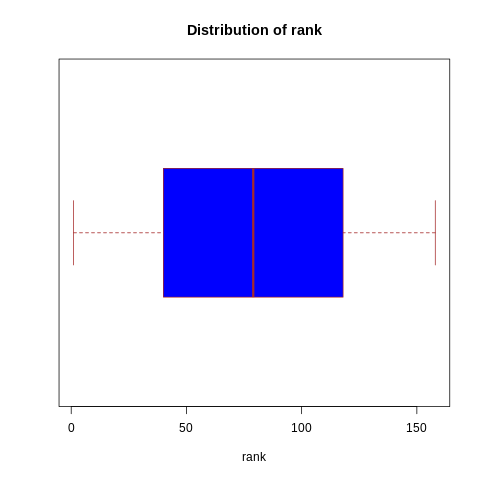

In [196]:
%%R

distrib(df$rank, "Distribution of rank", "rank")

Five number summary 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.693   4.510   5.322   5.379   6.189   7.769 


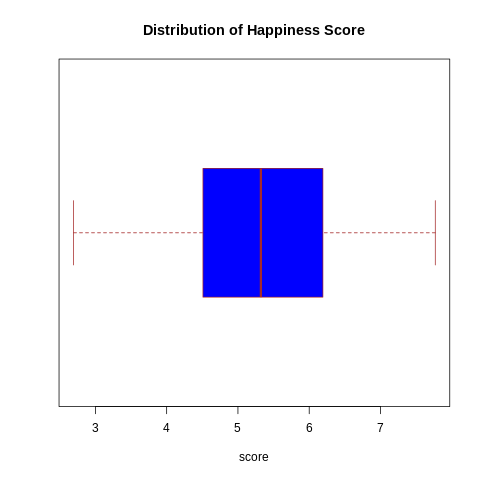

In [197]:
%%R

distrib(df$score, "Distribution of Happiness Score", "score")

Five number summary 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.6065  0.9822  0.9160  1.2362  2.0960 


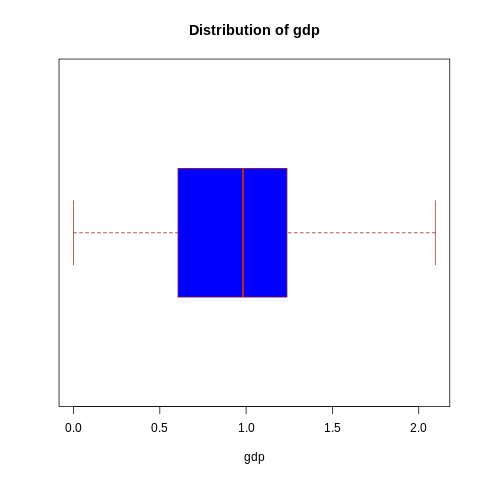

In [198]:
%%R

distrib(df$gdp, "Distribution of gdp", "gdp")

Five number summary 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.8694  1.1247  1.0784  1.3273  1.6440 


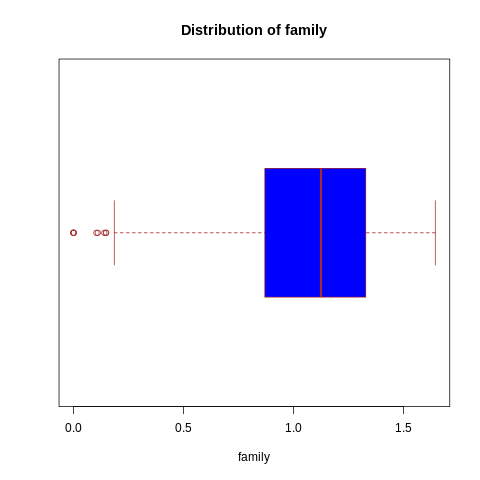

In [199]:
%%R

distrib(df$family, "Distribution of family", "family")

Five number summary 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4402  0.6473  0.6124  0.8080  1.1410 


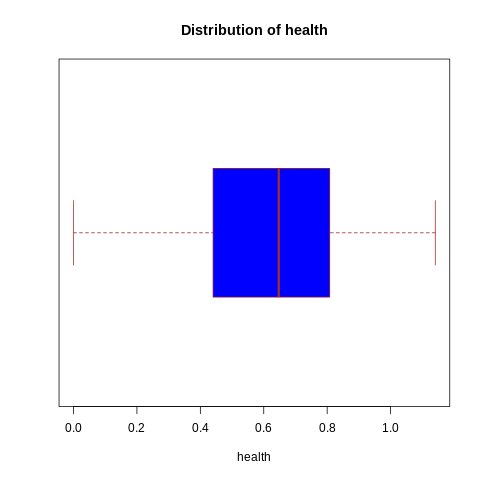

In [200]:
%%R

distrib(df$health, "Distribution of health", "health")

Five number summary 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.3098  0.4310  0.4111  0.5310  0.7240 


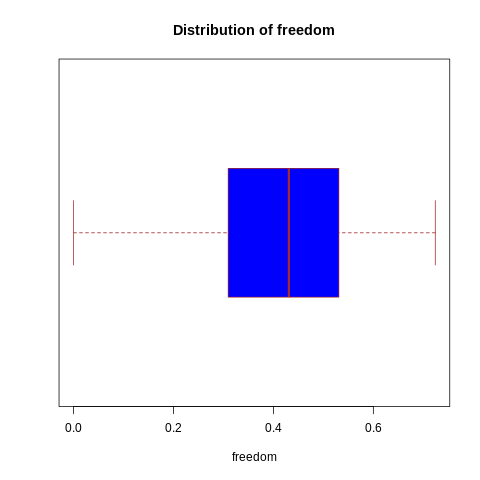

In [201]:
%%R

distrib(df$freedom, "Distribution of freedom", "freedom")

Five number summary 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.05425 0.09103 0.12544 0.15586 0.55191 


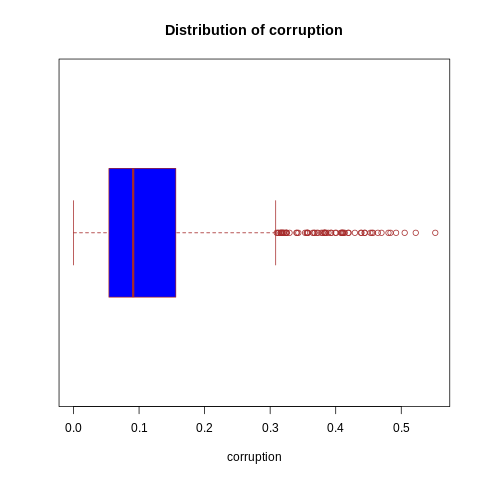

In [202]:
%%R

distrib(df$corruption, "Distribution of corruption", "corruption")

Five number summary 
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1300  0.2020  0.2186  0.2788  0.8381 


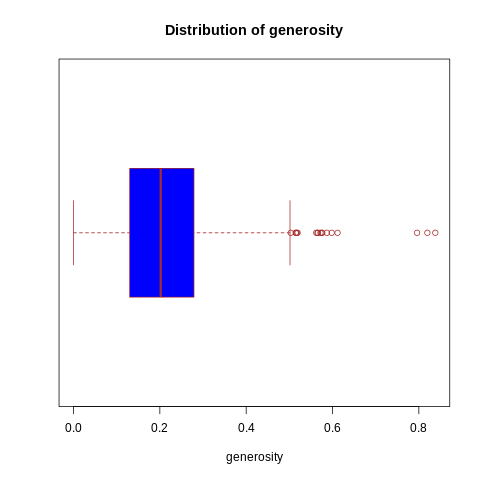

In [203]:
%%R

distrib(df$generosity, "Distribution of generosity", "generosity")

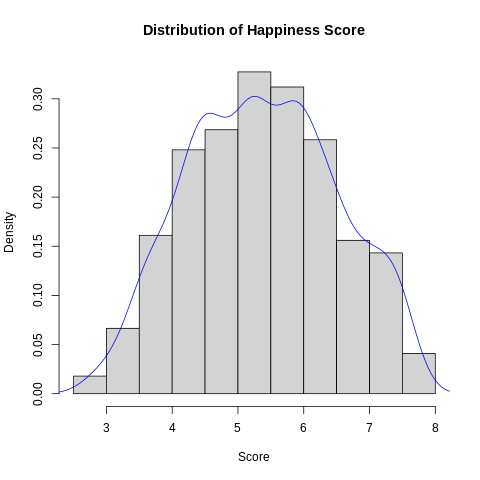

In [204]:
%%R

hist(df$score, freq = FALSE, main = "Distribution of Happiness Score", xlab = "Score")
dens <- density(df$score)
lines(dens, col = "blue")

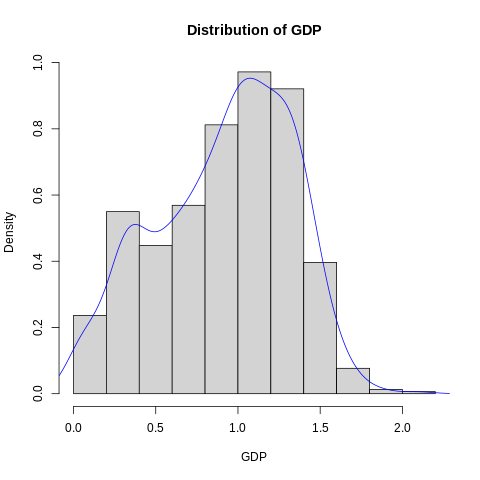

In [205]:
%%R

hist(df$gdp, freq = FALSE, main = "Distribution of GDP", xlab = "GDP")
dens <- density(df$gdp)
lines(dens, col = "blue")

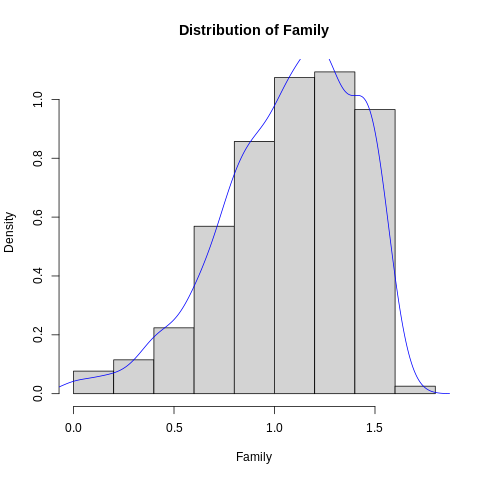

In [206]:
%%R

hist(df$family, freq = FALSE, main = "Distribution of Family", xlab = "Family")
dens <- density(df$family)
lines(dens, col = "blue")

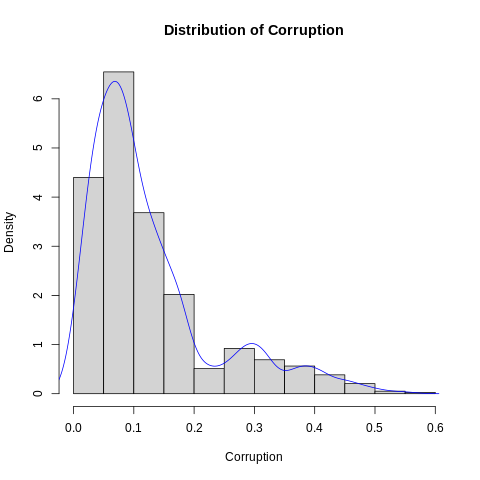

In [207]:
%%R

hist(df$corruption, freq = FALSE, main = "Distribution of Corruption", xlab = "Corruption")
dens <- density(df$corruption)
lines(dens, col = "blue")

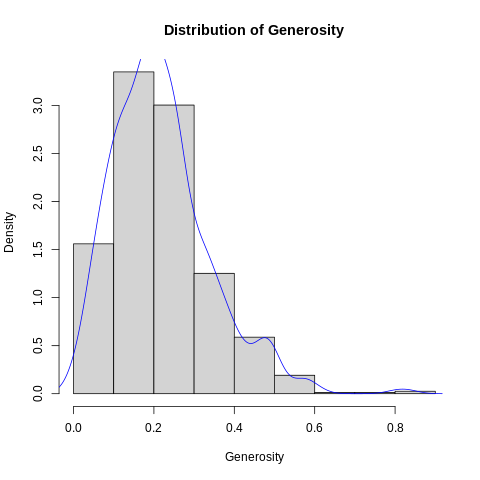

In [208]:
%%R

hist(df$generosity, freq = FALSE, main = "Distribution of Generosity", xlab = "Generosity")
dens <- density(df$generosity)
lines(dens, col = "blue")

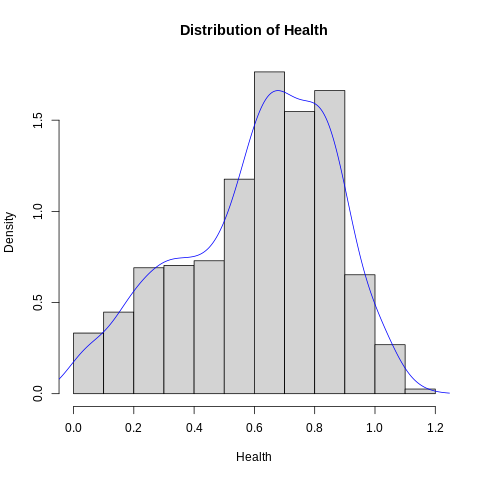

In [209]:
%%R

hist(df$health, freq = FALSE, main = "Distribution of Health", xlab = "Health")
dens <- density(df$health)
lines(dens, col = "blue")

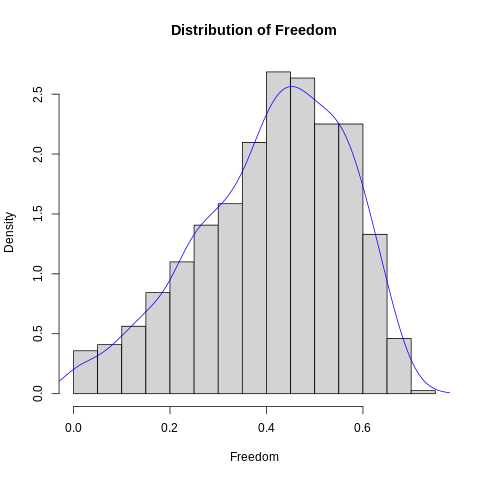

In [210]:
%%R

hist(df$freedom, freq = FALSE, main = "Distribution of Freedom", xlab = "Freedom")
dens <- density(df$freedom)
lines(dens, col = "blue")

### Visualizations

#### Top 20 countries by overall categories

In [211]:
%%R

repr.plot.width <- 12 
repr.plot.height <- 10

Score

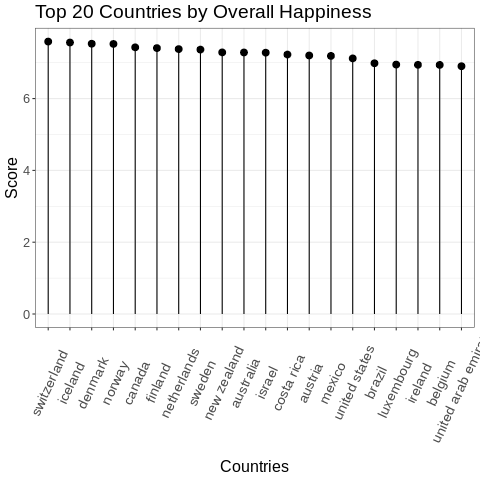

In [212]:
%%R

top_twenty_score <- head(df, n = 20)
top_twenty_score$country <- factor(top_twenty_score$country, levels = top_twenty_score$country)

theme_set(theme_bw())

ggplot(data = top_twenty_score, aes(x = country, y = score)) +
  geom_point(size = 3) +
  geom_segment(aes(x = country,
                   xend = country,
                   y = 0,
                   yend = score)) +
  labs(title = "Top 20 Countries by Overall Happiness",
       x = "Countries",
       y = "Score") +
  theme(axis.text.x = element_text(angle = 65, vjust = 0.6, size = 14),
       text = element_text(size = 16))

gdp

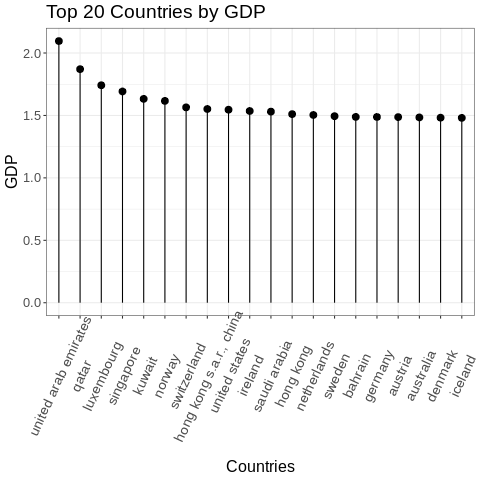

In [213]:
%%R

# Sorting and removing duplicates
top_twenty_gdp <- df[order(df$gdp, decreasing = TRUE), ]
top_twenty_gdp <- head(top_twenty_gdp, n = 200)
top_twenty_gdp <- top_twenty_gdp[!duplicated(top_twenty_gdp[ , c("country")]),]

top_twenty_gdp$country <- factor(top_twenty_gdp$country, levels = top_twenty_gdp$country)

top_twenty_gdp <- head(top_twenty_gdp, n = 20)

theme_set(theme_bw())

ggplot(data = top_twenty_gdp, aes(x = country, y = gdp)) +
  geom_point(size = 3) +
  geom_segment(aes(x = country,
                   xend = country,
                   y = 0,
                   yend = gdp)) +
  labs(title = "Top 20 Countries by GDP",
       x = "Countries",
       y = "GDP") +
  theme(axis.text.x = element_text(angle = 65, vjust = 0.6, size = 14),
       text = element_text(size = 16))

family

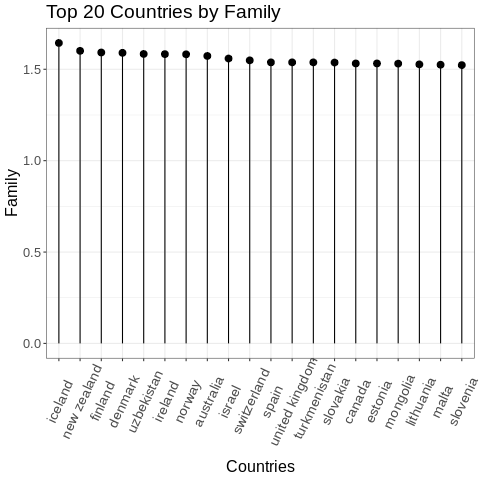

In [214]:
%%R

# Sorting and removing duplicates
top_twenty_family <- df[order(df$family, decreasing = TRUE), ]
top_twenty_family <- head(top_twenty_family, n = 200)
top_twenty_family <- top_twenty_family[!duplicated(top_twenty_family[ , c("country")]),]

top_twenty_family$country <- factor(top_twenty_family$country, levels = top_twenty_family$country)

top_twenty_family <- head(top_twenty_family, n = 20)

theme_set(theme_bw())

ggplot(data = top_twenty_family, aes(x = country, y = family)) +
  geom_point(size = 3) +
  geom_segment(aes(x = country,
                   xend = country,
                   y = 0,
                   yend = family)) +
  labs(title = "Top 20 Countries by Family",
       x = "Countries",
       y = "Family") +
  theme(axis.text.x = element_text(angle = 65, vjust = 0.6, size = 14),
       text = element_text(size = 16))

health

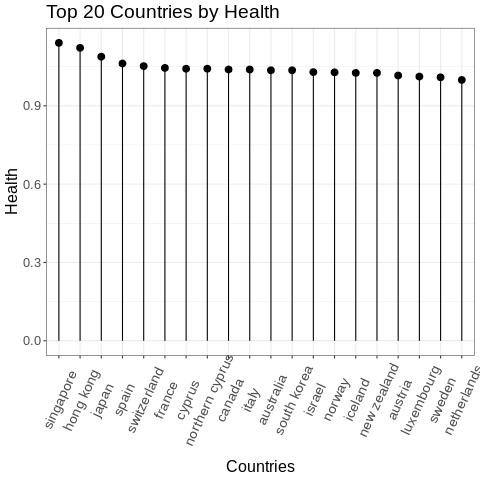

In [215]:
%%R

# Sorting and removing duplicates
top_twenty_health <- df[order(df$health, decreasing = TRUE), ]
top_twenty_health <- head(top_twenty_health, n = 200)
top_twenty_health <- top_twenty_health[!duplicated(top_twenty_health[ , c("country")]),]

top_twenty_health$country <- factor(top_twenty_health$country, levels = top_twenty_health$country)

top_twenty_health <- head(top_twenty_health, n = 20)

theme_set(theme_bw())

ggplot(data = top_twenty_health, aes(x = country, y = health)) +
  geom_point(size = 3) +
  geom_segment(aes(x = country,
                   xend = country,
                   y = 0,
                   yend = health)) +
  labs(title = "Top 20 Countries by Health",
       x = "Countries",
       y = "Health") +
  theme(axis.text.x = element_text(angle = 65, vjust = 0.6, size = 14),
       text = element_text(size = 16))

freedom

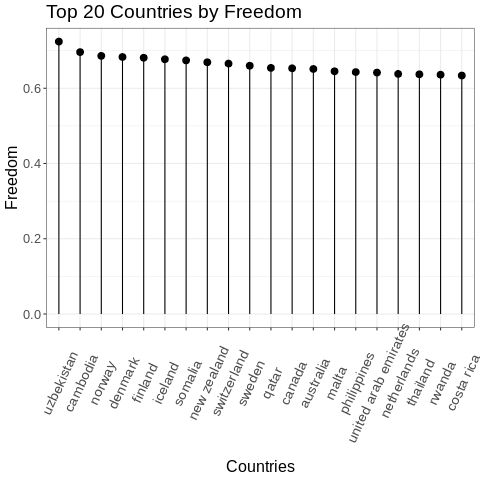

In [216]:
%%R

# Sorting and removing duplicates
top_twenty_freedom <- df[order(df$freedom, decreasing = TRUE), ]
top_twenty_freedom <- head(top_twenty_freedom, n = 200)
top_twenty_freedom <- top_twenty_freedom[!duplicated(top_twenty_freedom[ , c("country")]),]

top_twenty_freedom$country <- factor(top_twenty_freedom$country, levels = top_twenty_freedom$country)

top_twenty_freedom <- head(top_twenty_freedom, n = 20)

theme_set(theme_bw())

ggplot(data = top_twenty_freedom, aes(x = country, y = freedom)) +
  geom_point(size = 3) +
  geom_segment(aes(x = country,
                   xend = country,
                   y = 0,
                   yend = freedom)) +
  labs(title = "Top 20 Countries by Freedom",
       x = "Countries",
       y = "Freedom") +
  theme(axis.text.x = element_text(angle = 65, vjust = 0.6, size = 14),
       text = element_text(size = 16))

corruption

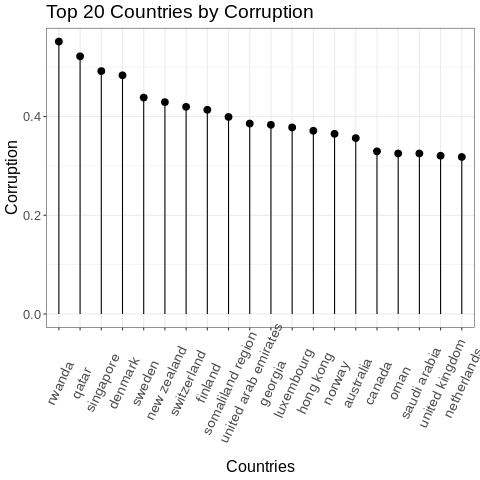

In [217]:
%%R

# Sorting and removing duplicates
top_twenty_corruption <- df[order(df$corruption, decreasing = TRUE), ]
top_twenty_corruption <- head(top_twenty_corruption, n = 200)
top_twenty_corruption <- top_twenty_corruption[!duplicated(top_twenty_corruption[ , c("country")]),]

top_twenty_corruption$country <- factor(top_twenty_corruption$country, levels = top_twenty_corruption$country)

top_twenty_corruption <- head(top_twenty_corruption, n = 20)

theme_set(theme_bw())

ggplot(data = top_twenty_corruption, aes(x = country, y = corruption)) +
  geom_point(size = 3) +
  geom_segment(aes(x = country,
                   xend = country,
                   y = 0,
                   yend = corruption)) +
  labs(title = "Top 20 Countries by Corruption",
       x = "Countries",
       y = "Corruption") +
  theme(axis.text.x = element_text(angle = 65, vjust = 0.6, size = 14),
       text = element_text(size = 16))

generosity

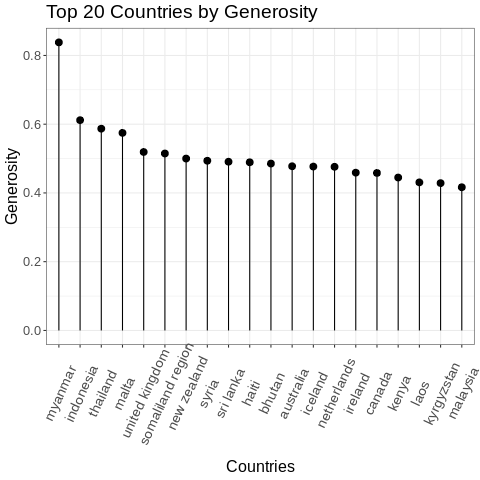

In [218]:
%%R

# Sorting and removing duplicates
top_twenty_generosity <- df[order(df$generosity, decreasing = TRUE), ]
top_twenty_generosity <- head(top_twenty_generosity, n = 200)
top_twenty_generosity <- top_twenty_generosity[!duplicated(top_twenty_generosity[ , c("country")]),]

top_twenty_generosity$country <- factor(top_twenty_generosity$country, levels = top_twenty_generosity$country)

top_twenty_generosity <- head(top_twenty_generosity, n = 20)

theme_set(theme_bw())

ggplot(data = top_twenty_generosity, aes(x = country, y = generosity)) +
  geom_point(size = 3) +
  geom_segment(aes(x = country,
                   xend = country,
                   y = 0,
                   yend = generosity)) +
  labs(title = "Top 20 Countries by Generosity",
       x = "Countries",
       y = "Generosity") +
  theme(axis.text.x = element_text(angle = 65, vjust = 0.6, size = 14),
       text = element_text(size = 16))

#### Comparing happiness score of countries using world map

765 codes from your data successfully matched countries in the map
17 codes from your data failed to match with a country code in the map
82 codes from the map weren't represented in your data


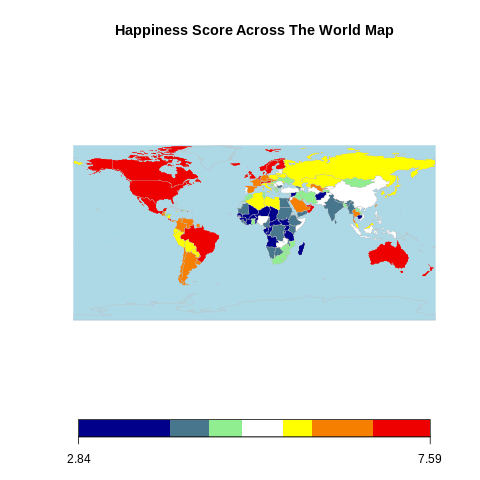

In [219]:
%%R

d <- data.frame(
  country=df$country,
  value=df$score)

n <- joinCountryData2Map(d, joinCode="NAME", nameJoinColumn="country")

mapCountryData(n, nameColumnToPlot="value", mapTitle="Happiness Score Across The World Map", colourPalette="diverging", oceanCol="lightBlue")

## Regression analysis

In [220]:
%%R
# Multi-linear regression
multiple.regression <- lm(score ~ gdp + family + health + freedom 
                       + corruption + generosity, data=df[, c(2:9)])

# Printing summary of variance table of the results
summary(multiple.regression)


Call:
lm(formula = score ~ gdp + family + health + freedom + corruption + 
    generosity, data = df[, c(2:9)])

Residuals:
     Min       1Q   Median       3Q      Max 
-1.93063 -0.32722  0.01712  0.35756  1.66431 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.17749    0.07981  27.283  < 2e-16 ***
gdp          1.14675    0.08276  13.857  < 2e-16 ***
family       0.64109    0.08062   7.952 6.47e-15 ***
health       1.00394    0.13140   7.641 6.39e-14 ***
freedom      1.47913    0.16338   9.053  < 2e-16 ***
corruption   0.85366    0.22328   3.823 0.000142 ***
generosity   0.59359    0.17564   3.380 0.000762 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5498 on 775 degrees of freedom
Multiple R-squared:  0.764,	Adjusted R-squared:  0.7622 
F-statistic: 418.2 on 6 and 775 DF,  p-value: < 2.2e-16



In [221]:
%%R

# Printing analysis of variance table of the results
anova(multiple.regression)

Analysis of Variance Table

Response: score
            Df Sum Sq Mean Sq  F value    Pr(>F)    
gdp          1 618.47  618.47 2046.102 < 2.2e-16 ***
family       1  52.48   52.48  173.614 < 2.2e-16 ***
health       1  22.66   22.66   74.960 < 2.2e-16 ***
freedom      1  54.78   54.78  181.237 < 2.2e-16 ***
corruption   1   6.68    6.68   22.101 3.062e-06 ***
generosity   1   3.45    3.45   11.422 0.0007622 ***
Residuals  775 234.26    0.30                       
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [222]:
%%R

# Printing coefficients
coefficients(multiple.regression)

(Intercept)         gdp      family      health     freedom  corruption 
  2.1774883   1.1467494   0.6410872   1.0039393   1.4791289   0.8536611 
 generosity 
  0.5935932 


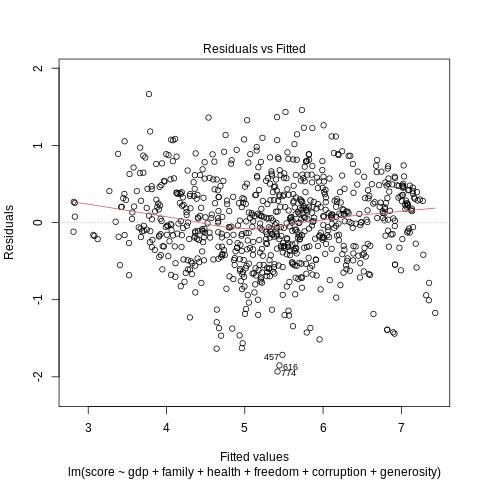

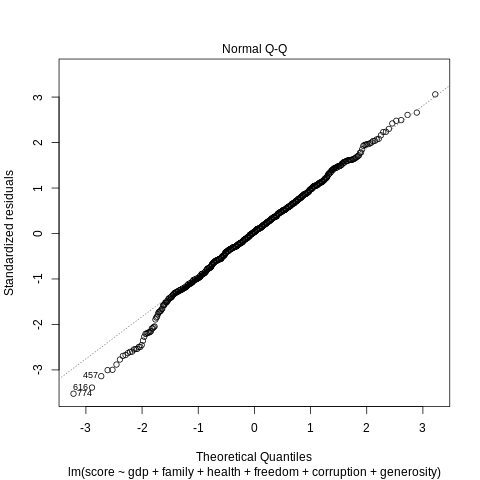

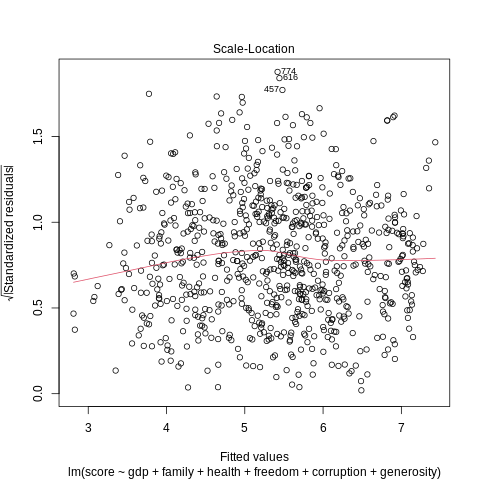

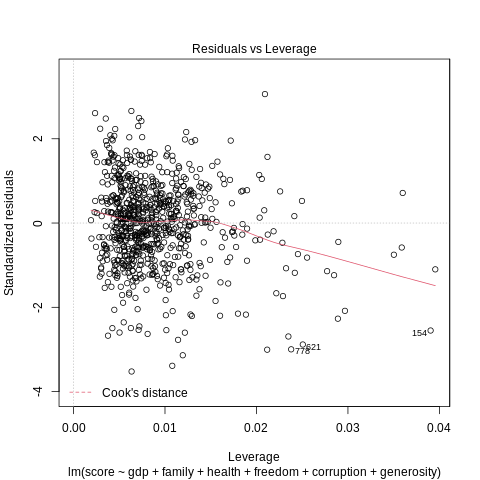

In [223]:
%%R

plot(multiple.regression)

A way to test the reliability of our model is to analyze the distribution of it's residuals. We will do this by looking at Q-Q plots, histograms, and by running skewness tests.

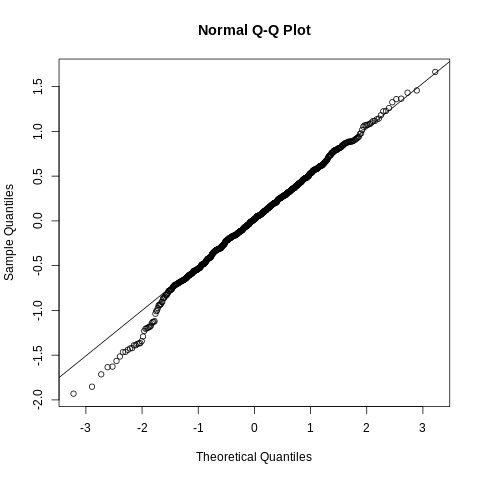

In [224]:
%%R

qqnorm(multiple.regression$residuals);qqline(multiple.regression$residuals)

# Plot show the residuals approximately lie on the Q-Q line with some variance.

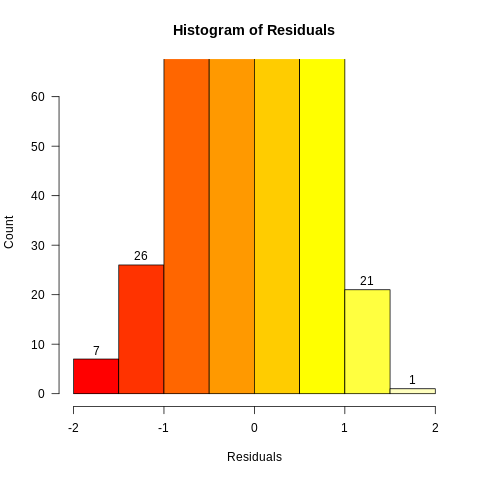

In [225]:
%%R

repr.plot.width = 14 
repr.plot.height = 12

h <- hist(
        x = multiple.regression$residuals,
        xlab = "Residuals",
        ylab = "Count",
        main = "Histogram of Residuals",
        las = 1,
        ylim = c(0,65),
        col = heat.colors(8)
)

text(
    x = h$mids,
    y = h$counts,
    labels = h$counts,
    adj = c(0.5,-0.5)
)

In [226]:
%%R

cat("Skewness of model: ", round(skewness(multiple.regression$residuals), 3))

# We can see model is not skwewed

Skewness of model:  -0.286

# Analysis

## Correlation

In [227]:
%%R


# Excluding country, and year columns
df_corr = df[, c(2:9)]

head(df_corr)

  rank score     gdp  family  health freedom corruption generosity
1    1 7.587 1.39651 1.34951 0.94143 0.66557    0.41978    0.29678
2    2 7.561 1.30232 1.40223 0.94784 0.62877    0.14145    0.43630
3    3 7.527 1.32548 1.36058 0.87464 0.64938    0.48357    0.34139
4    4 7.522 1.45900 1.33095 0.88521 0.66973    0.36503    0.34699
5    5 7.427 1.32629 1.32261 0.90563 0.63297    0.32957    0.45811
6    6 7.406 1.29025 1.31826 0.88911 0.64169    0.41372    0.23351


In [228]:
%%R

# Correlation of all variables with score (happiness score)
corr <- cor(df_corr[, -1], method="pearson")
corr

               score         gdp      family     health   freedom corruption
score      1.0000000  0.78928400  0.64879934 0.74245574 0.5512580  0.3980267
gdp        0.7892840  1.00000000  0.58596553 0.78433757 0.3405110  0.3046554
family     0.6487993  0.58596553  1.00000000 0.57265026 0.4203608  0.1263331
health     0.7424557  0.78433757  0.57265026 1.00000000 0.3407451  0.2505034
freedom    0.5512580  0.34051099  0.42036084 0.34074513 1.0000000  0.4593896
corruption 0.3980267  0.30465539  0.12633312 0.25050338 0.4593896  1.0000000
generosity 0.1375777 -0.01456048 -0.03726161 0.01063811 0.2907055  0.3189051
            generosity
score       0.13757773
gdp        -0.01456048
family     -0.03726161
health      0.01063811
freedom     0.29070551
corruption  0.31890511
generosity  1.00000000


In [229]:
%%R


subset(corr, select = c(score))

               score
score      1.0000000
gdp        0.7892840
family     0.6487993
health     0.7424557
freedom    0.5512580
corruption 0.3980267
generosity 0.1375777


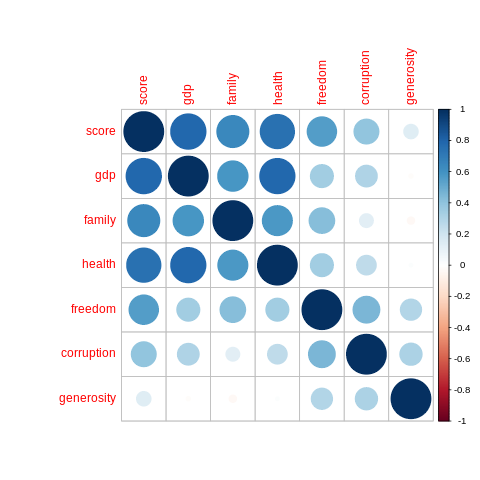

In [230]:
%%R

corr <- cor(df_corr[, -1], method="pearson")
corrplot(corr, method = "circle")

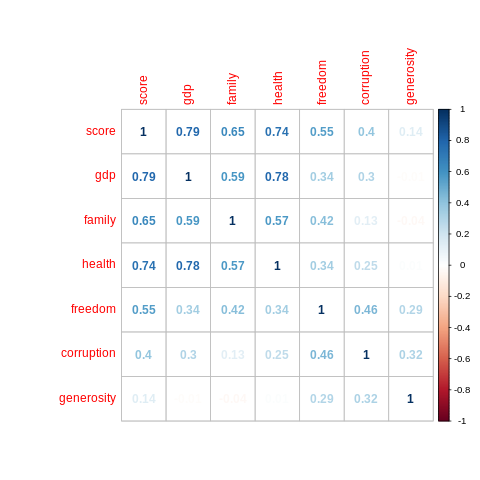

In [231]:
%%R

corrplot(corr, method = "number")

In [232]:
%%R

# Function to visualize correlation of features against happiness score
plot.corr <- function(x, y, xl, yl) {
   # Creating the plot
  plot(x, y, pch = 19, col = "lightblue", xlab = xl, ylab = yl)
  # Regression line
  abline(lm(y ~ x), col = "red", lwd = 3)
  # Pearson correlation
  mtext(paste("Correlation:", round(cor(x, y), 2)), side=3, adj=0, line=1.2, cex=2, font=2);
}

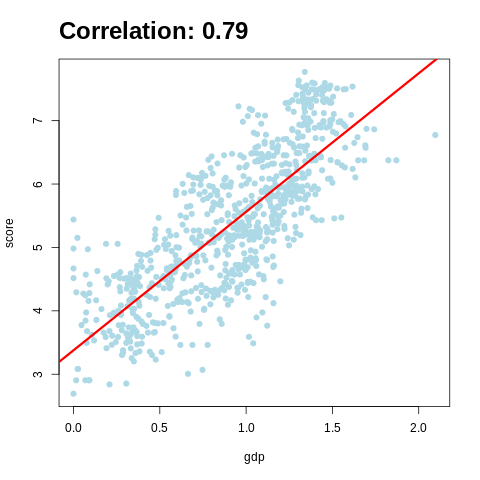

In [233]:
%%R

plot.corr(df$gdp, df$score, "gdp", "score")

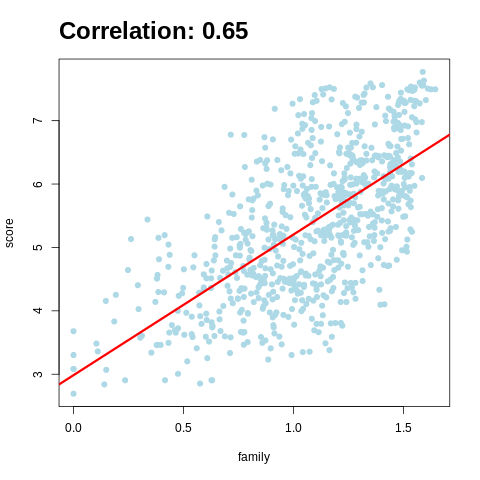

In [234]:
%%R

plot.corr(df$family, df$score, "family", "score")

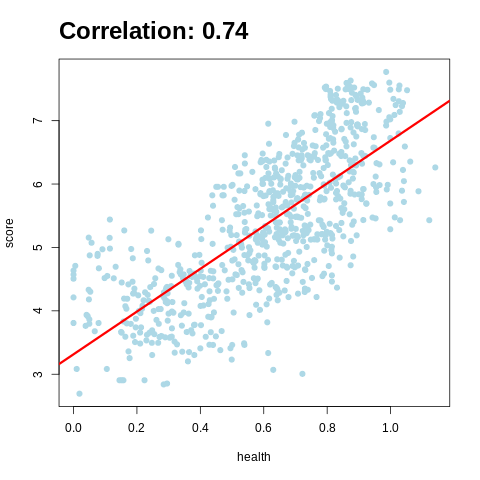

In [235]:
%%R

plot.corr(df$health, df$score, "health", "score")

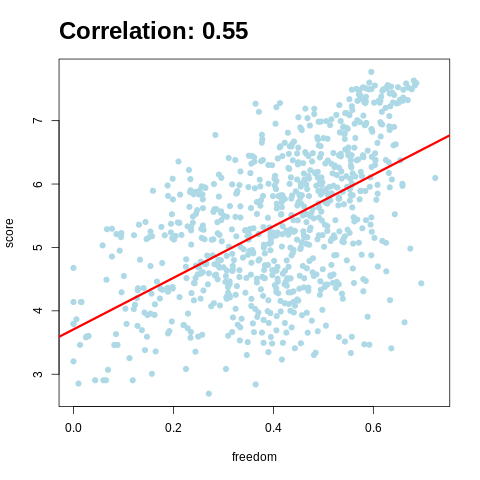

In [236]:
%%R

plot.corr(df$freedom, df$score, "freedom", "score")

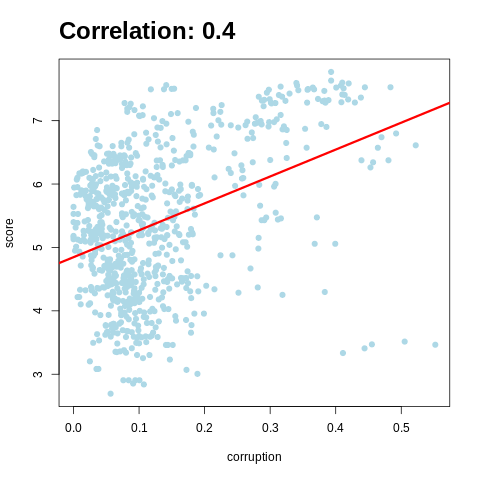

In [237]:
%%R

plot.corr(df$corruption, df$score, "corruption", "score")

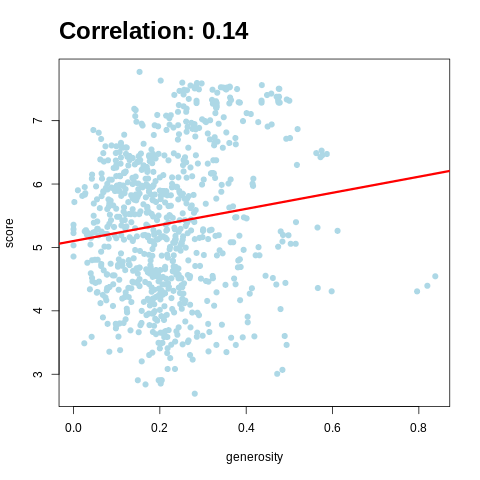

In [238]:
%%R

plot.corr(df$generosity, df$score, "generosity", "score")

## Covariance

In [239]:
%%R


# Excluding country, and year columns
df_cov = df[, c(2:9)]

head(df_cov)

  rank score     gdp  family  health freedom corruption generosity
1    1 7.587 1.39651 1.34951 0.94143 0.66557    0.41978    0.29678
2    2 7.561 1.30232 1.40223 0.94784 0.62877    0.14145    0.43630
3    3 7.527 1.32548 1.36058 0.87464 0.64938    0.48357    0.34139
4    4 7.522 1.45900 1.33095 0.88521 0.66973    0.36503    0.34699
5    5 7.427 1.32629 1.32261 0.90563 0.63297    0.32957    0.45811
6    6 7.406 1.29025 1.31826 0.88911 0.64169    0.41372    0.23351


In [240]:
%%R

# Covariance of all variables with score (happiness score)
covv <- cov(df_cov[, -1])
covv

                score           gdp       family       health     freedom
score      1.27115807  0.3624851969  0.241062293 0.2078558164 0.095018147
gdp        0.36248520  0.1659259826  0.078658991 0.0793326661 0.021205094
family     0.24106229  0.0786589912  0.108602095 0.0468597964 0.021178403
health     0.20785582  0.0793326661  0.046859796 0.0616571809 0.012935206
freedom    0.09501815  0.0212050938  0.021178403 0.0129352063 0.023372423
corruption 0.04745554  0.0131232387  0.004402621 0.0065777957 0.007426908
generosity 0.01897353 -0.0007254928 -0.001502038 0.0003231145 0.005436323
            corruption    generosity
score      0.047455542  0.0189735267
gdp        0.013123239 -0.0007254928
family     0.004402621 -0.0015020378
health     0.006577796  0.0003231145
freedom    0.007426908  0.0054363232
corruption 0.011182784  0.0041251199
generosity 0.004125120  0.0149623656


In [241]:
%%R

subset(covv, select = c(score))

                score
score      1.27115807
gdp        0.36248520
family     0.24106229
health     0.20785582
freedom    0.09501815
corruption 0.04745554
generosity 0.01897353


## Anova

In [242]:
# See regression analysis sub-section for code and relevant outputs of Anova table

## Multicollinearity

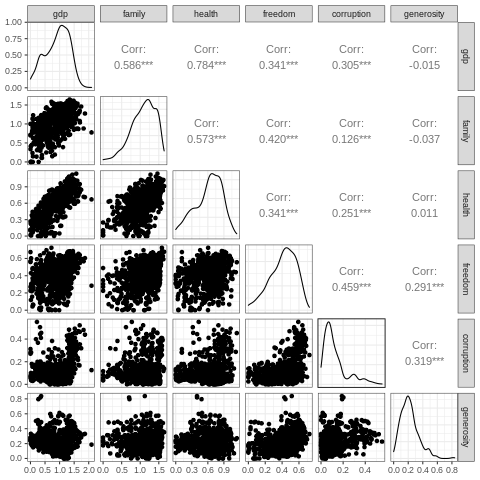

In [243]:
%%R

# pair-wise correlation among all the explanatory variables to test for multicollinearity
x <- df[, c("gdp", "family", "health", "freedom", "corruption", "generosity")]
ggpairs(x)

# Diagonal represents the density plots for gdp, family, health, freedom, corruption, and generosity
# We can see only health and gdp are high correlated with each other whereas family-gdp and health-family are moderately correlated with each other

VIF Score

In [244]:
%%R

vif_score <- car::vif(multiple.regression)
vif_score

       gdp     family     health    freedom corruption generosity 
  2.936310   1.823643   2.750506   1.611972   1.440463   1.192625 


Visualizing VIF Scores

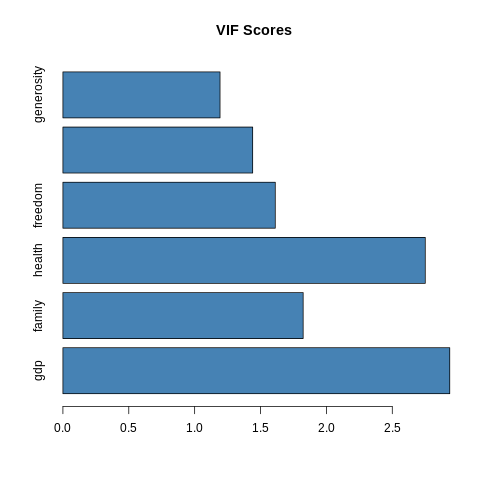

In [245]:
%%R

# horizontal bar chart to display each VIF score
barplot(vif_score, main = "VIF Scores", horiz = TRUE, col = "steelblue")